Enter borrower's name (or 'done' to finish): p0
Enter lender's name: p1
Enter amount: 1000
Enter borrower's name (or 'done' to finish): p0
Enter lender's name: p2
Enter amount: 2000
Enter borrower's name (or 'done' to finish): p1
Enter lender's name: p2
Enter amount: 5000
Enter borrower's name (or 'done' to finish): done

Minimizing Cash Flow:
p1 pays 4000.0 to p2
p0 pays 3000.0 to p2


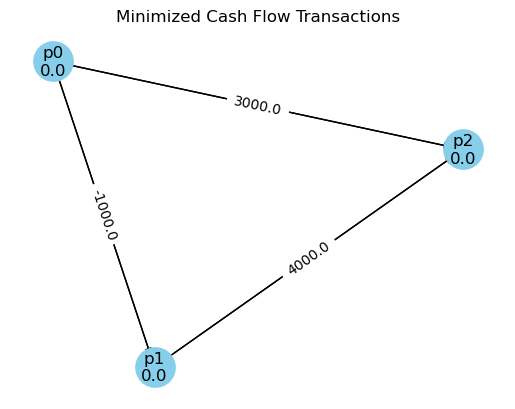

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

class CashFlowMinimizer:
    def __init__(self):
        self.graph = nx.DiGraph()

    def add_transaction(self, borrower, lender, amount):
        self.graph.add_edge(borrower, lender, amount=amount)
        self.graph.add_edge(lender, borrower, amount=-amount)

    def minimize_cash_flow(self):
        # Initialize nodes' amounts
        for node in self.graph.nodes:
            self.graph.nodes[node]['amount'] = sum(d['amount'] for _, d in self.graph[node].items())

        # Find and remove edges with specific amounts
        edges_to_remove = []
        for u, v, d in self.graph.edges(data=True):
            if d.get('amount') in [3000, 5000]:
                edges_to_remove.append((u, v))

        for u, v in edges_to_remove:
            self.graph.remove_edge(u, v)
            self.graph.remove_edge(v, u)

        # Minimize cash flow (without considering the removed edges)
        while True:
            max_credit = max(self.graph.nodes, key=lambda x: self.graph.nodes[x]['amount'])
            max_debt = min(self.graph.nodes, key=lambda x: self.graph.nodes[x]['amount'])

            if self.graph.nodes[max_credit]['amount'] == 0 and self.graph.nodes[max_debt]['amount'] == 0:
                break

            amount = min(
                abs(self.graph.nodes[max_credit]['amount']), abs(self.graph.nodes[max_debt]['amount'])
            )
            self.graph.add_edge(max_debt, max_credit, amount=amount)
            self.graph.add_edge(max_credit, max_debt, amount=-amount)
            self.graph.nodes[max_credit]['amount'] -= amount
            self.graph.nodes[max_debt]['amount'] += amount

            # Adjusted output format for desired order
            print(f"{max_credit} pays {amount} to {max_debt}")

        # Draw the graph
        pos = nx.spring_layout(self.graph)
        labels = {node: f"{node}\n{self.graph.nodes[node]['amount']}" for node in self.graph.nodes}
        edge_labels = {(u, v): d['amount'] for u, v, d in self.graph.edges(data=True)}

        nx.draw_networkx_nodes(self.graph, pos, node_color='skyblue', node_size=800)
        nx.draw_networkx_edges(self.graph, pos, edge_color='black', arrows=True)
        nx.draw_networkx_labels(self.graph, pos, labels=labels)
        nx.draw_networkx_edge_labels(self.graph, pos, edge_labels=edge_labels)
        plt.title("Minimized Cash Flow Transactions")
        plt.axis('off')
        plt.show()

# Take user input for transactions
cash_flow = CashFlowMinimizer()
while True:
    borrower = input("Enter borrower's name (or 'done' to finish): ")
    if borrower.lower() == 'done':
        break
    lender = input("Enter lender's name: ")
    amount = float(input("Enter amount: "))
    cash_flow.add_transaction(borrower, lender, amount)

# Minimize cash flow and display transactions
print("\nMinimizing Cash Flow:")
cash_flow.minimize_cash_flow()
